In [1]:
import pandas as pd

In [2]:
kaarina = pd.read_csv("Kaarina Kaarina 5.3.2024 - 15.4.2024_1a491af2-433f-4df9-80ec-044817912cc4.csv")

In [3]:
kaarina.head(5)

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [UTC],Hengitettävät hiukkaset <10 µm [µg/m3],Pienhiukkaset <2.5 µm [µg/m3]
0,Kaarina Kaarina,2024,3,5,00:00,8.2,-
1,Kaarina Kaarina,2024,3,5,01:00,13.4,-
2,Kaarina Kaarina,2024,3,5,02:00,12.7,-
3,Kaarina Kaarina,2024,3,5,03:00,13.8,-
4,Kaarina Kaarina,2024,3,5,04:00,10.5,-


In [5]:
# Mittaustuloksia pienhiukkasista ei ilmeisesti ole
kaarina["Pienhiukkaset <2.5 µm [µg/m3]"].value_counts()

Pienhiukkaset <2.5 µm [µg/m3]
-    996
Name: count, dtype: int64

In [45]:
import numpy as np
# Muunetaan "-" NaN arvoksi
kaarina = kaarina.replace('-',np.NaN)
kaarina["Date"] = kaarina["Vuosi"].astype(str) + "-" + kaarina["Kuukausi"].astype(str) + "-" +  kaarina["Päivä"].astype(str) + " " + kaarina["Aika [UTC]"]
kaarina["Date"] = pd.to_datetime(kaarina["Date"])
kaarina["Hengitettävät hiukkaset <10 µm [µg/m3]"] = kaarina["Hengitettävät hiukkaset <10 µm [µg/m3]"].astype(float)
kaarina.dtypes

Havaintoasema                                     object
Vuosi                                              int64
Kuukausi                                           int64
Päivä                                              int64
Aika [UTC]                                        object
Hengitettävät hiukkaset <10 µm [µg/m3]           float64
Pienhiukkaset <2.5 µm [µg/m3]                    float64
Date                                      datetime64[ns]
dtype: object

In [41]:
#NaN rivien määrä ja kaikkien rivien määrä

print(f"Tyhjien rivien määrä: {len(kaarina[kaarina['Hengitettävät hiukkaset <10 µm [µg/m3]'].isna()])}")
print(f"Rivien määrä: {len(kaarina)}")
print(f"Tyhjät rivit: {((len(kaarina[kaarina['Hengitettävät hiukkaset <10 µm [µg/m3]'].isna()]) / len(kaarina)) * 100)}%")

Tyhjien rivien määrä: 12
Rivien määrä: 996
Tyhjät rivit: 1.2048192771084338%


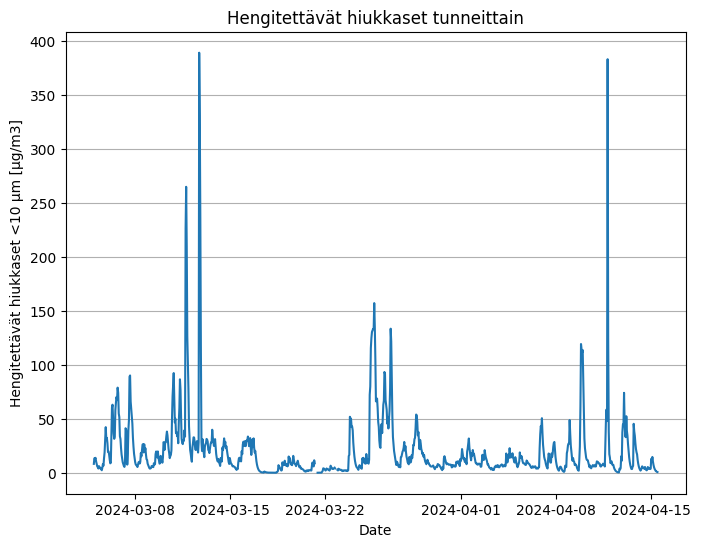

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(kaarina["Date"], kaarina["Hengitettävät hiukkaset <10 µm [µg/m3]"])
plt.title("Hengitettävät hiukkaset tunneittain")
plt.ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
plt.xlabel("Date")
plt.grid(axis='y', linestyle='-')
plt.show()

In [47]:
print(f"Hengitettävien hiukkasten keskiarvo: {round(kaarina['Hengitettävät hiukkaset <10 µm [µg/m3]'].mean(),3)} [µg/m3]")
print(f"Hengitettävien hiukkasten mediaani: {round(kaarina['Hengitettävät hiukkaset <10 µm [µg/m3]'].median(), 3)} [µg/m3]")
print(f"Hengitettävien hiukkasten maksimiarvo: {round(kaarina['Hengitettävät hiukkaset <10 µm [µg/m3]'].max(),3)} [µg/m3]")
print(f"Hengitettävien hiukkasten minimiarvo: {round(kaarina['Hengitettävät hiukkaset <10 µm [µg/m3]'].min(), 3)} [µg/m3]")

Hengitettävien hiukkasten keskiarvo: 20.143 [µg/m3]
Hengitettävien hiukkasten mediaani: 10.2 [µg/m3]
Hengitettävien hiukkasten maksimiarvo: 389.0 [µg/m3]
Hengitettävien hiukkasten minimiarvo: 0.0 [µg/m3]


In [ ]:
df2 = kaarina[["Date", "Hengitettävät hiukkaset <10 µm [µg/m3]"]].set_index('Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
plt.figure(figsize=(8,6))
plt.plot(df2)
plt.ylim(0,250)
plt.yticks([20,50,100,200],["<20 - Hyvä", "<50 - Tyydyttävä", "<100 - Välttävä", "<200 - Huono"])
plt.title("Hengitettävät hiukkaset päivittäin")
plt.ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
plt.xlabel("Date")
plt.grid(axis='y', linestyle='-')
plt.show()